<a href="https://colab.research.google.com/github/ask-kawade/-Bike-Sharing-Demand-Prediction-Project/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [ ]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV file loaction path
file_path= '/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECTS/Superivised learning project/Copy of SeoulBikeData.csv'

In [ ]:
# Reading CSV file. 
bike_df=pd.read_csv(file_path,encoding="latin-1")

# *Data Exploration And Data Cleaning*

In [ ]:
# Check Total rows and Columns in dataset.
bike_df.shape

(8760, 14)

In [ ]:
# Check the info of dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

##***Observations*** 
###1)Rows- 8760
###2)Columns-14
###3)Null values/missing values- 0
###4)Date- columns need to convert into proper data type.

###5)Columns to convert inot numeric
  * seasons
  * holiday
  * functioning day


###6) Rename columns-
   * Temperature(°C)
   * Humidity(%)
   * Wind speed (m/s)
   * Visibility (10m)
   * Dew point temperature(°C)
   * Solar Radiation (MJ/m2)
   * Rainfall(mm)
   * Snowfall (cm)
   * Rented Bike Count,Functioning Day(Beacuse white spaces are present which makes difficult to copy variable name.)
   





In [ ]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [ ]:
bike_df['Date']=bike_df['Date'].astype('datetime64[ns]')


In [ ]:
bike_df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_df.tail()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
bike_df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
bike_df.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

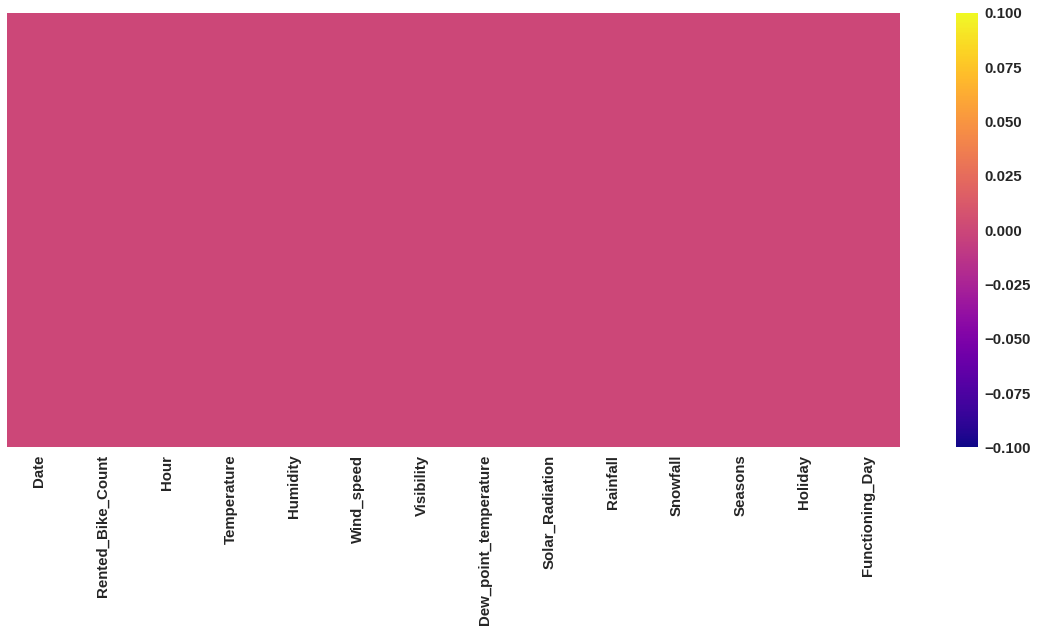

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(bike_df.isnull(),cmap='plasma',annot=False,yticklabels=False)

In [ ]:
# checking Duplicate rows
bike_df.duplicated().value_counts()

# No duplicate rows found

False    8760
dtype: int64

In [ ]:
bike_df.shape

(8760, 14)

In [ ]:
# drop duplicates.
bike_df=bike_df.drop_duplicates()
bike_df.shape

(8760, 14)

In [ ]:
bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
# check value_counts of Unique values

bike_df['Date'].value_counts()

2017-01-12    24
2018-09-08    24
2018-07-08    24
2018-06-08    24
2018-05-08    24
              ..
2018-03-31    24
2018-03-30    24
2018-03-29    24
2018-03-28    24
2018-11-30    24
Name: Date, Length: 365, dtype: int64

In [ ]:
bike_df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
bike_df['Snowfall'].unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 3. , 3.3,
       3.5, 3.4, 2.8, 1.5, 3.8, 3.7, 7.1, 8.8, 7. , 6. , 3.6, 2.9])

In [ ]:
bike_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
bike_df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
bike_df['Functioning_Day'].unique()

array(['Yes', 'No'], dtype=object)

# Catergorical Columns

In [ ]:
cat_columns=['Seasons','Holiday','Functioning_Day']

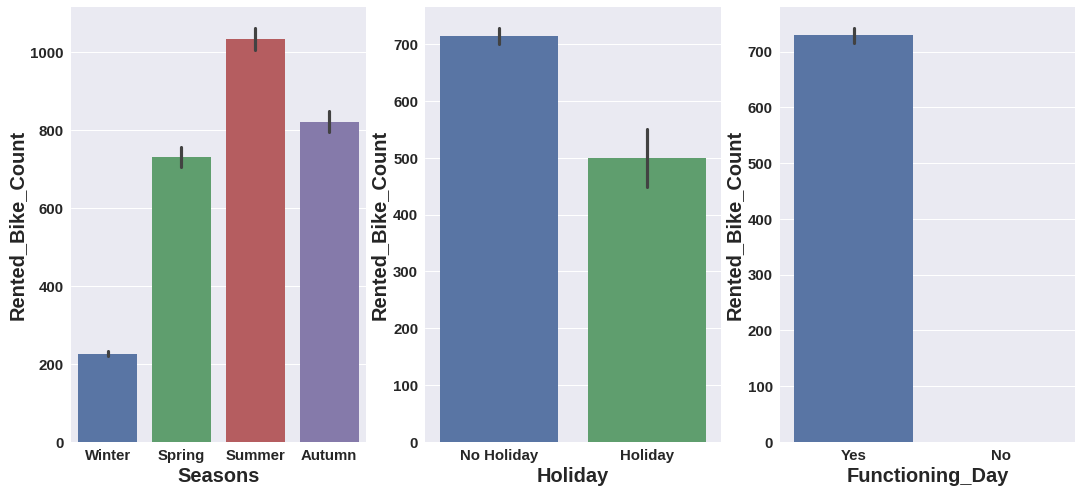

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
sns.barplot(data=bike_df, x=bike_df['Seasons'],y=bike_df['Rented_Bike_Count'], ax=ax[0])
sns.barplot(data=bike_df, x=bike_df['Holiday'],y=bike_df['Rented_Bike_Count'], ax=ax[1]);
sns.barplot(data=bike_df, x=bike_df['Functioning_Day'],y=bike_df['Rented_Bike_Count'], ax=ax[2]);

We have a data of 1 year only

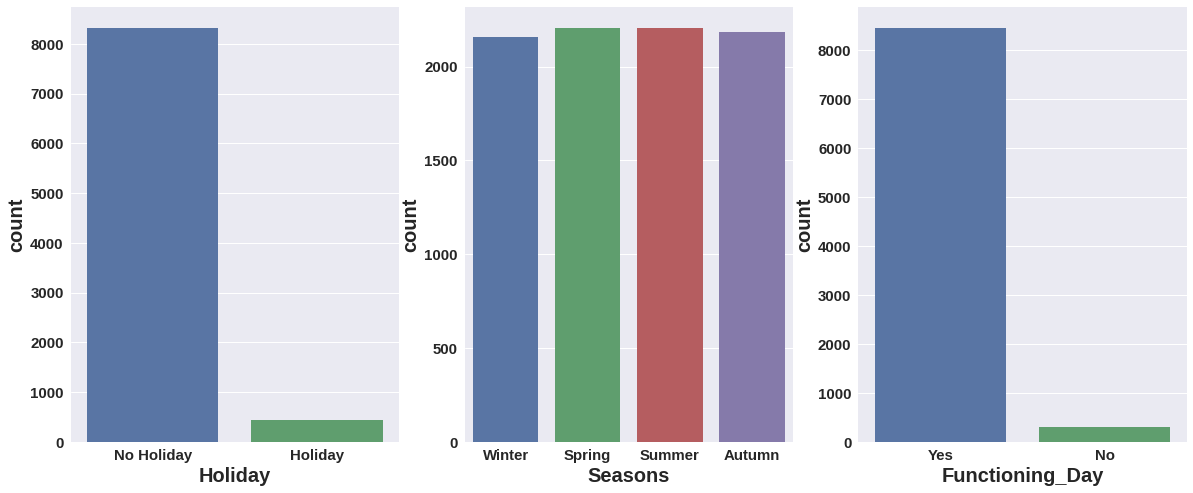

In [ ]:
fig, ax=plt.subplots(1,3,figsize=(20,8))
sns.countplot(x=bike_df['Holiday'],ax=ax[0])
sns.countplot(x=bike_df['Seasons'],ax=ax[1])
sns.countplot(x=bike_df['Functioning_Day'],ax=ax[2])

#Numerical columns

In [ ]:
bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

#Checking for outliers in Numerical columns.

In [ ]:
numeric_col=['Hour', 'Temperature', 'Humidity','Wind_speed', 'Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall',]

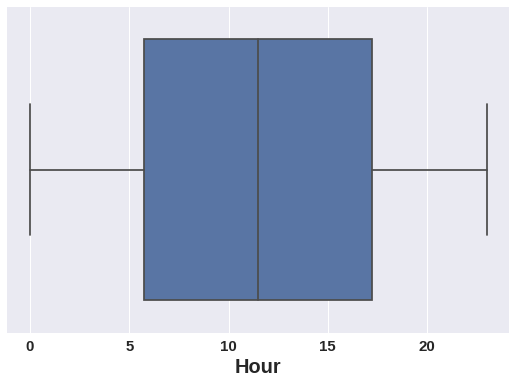

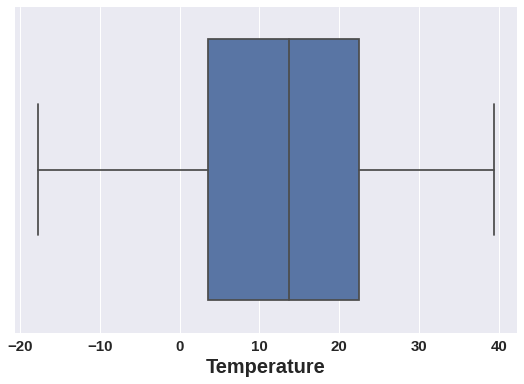

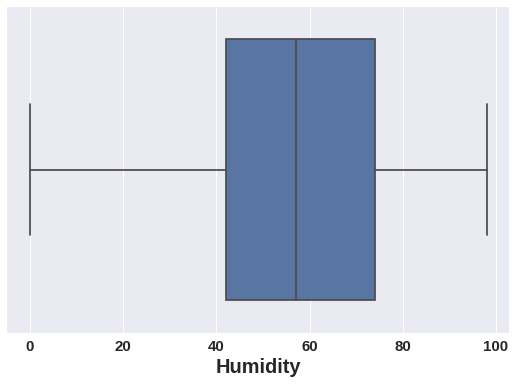

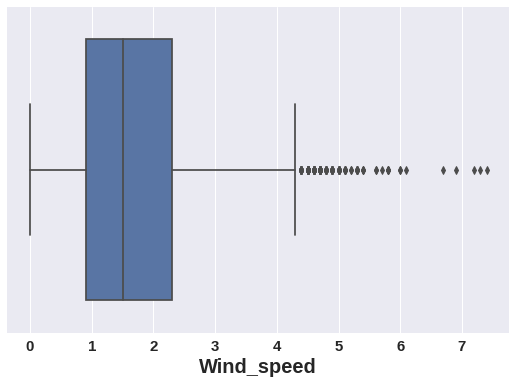

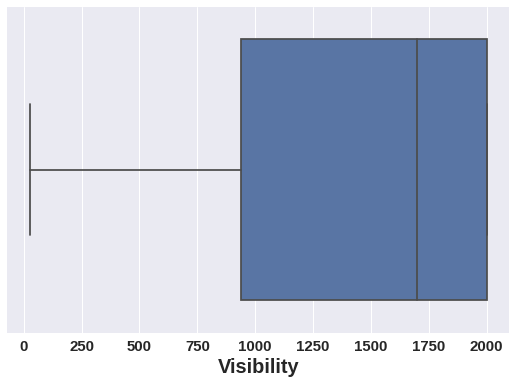

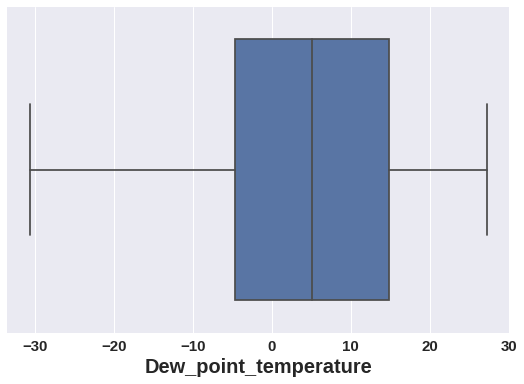

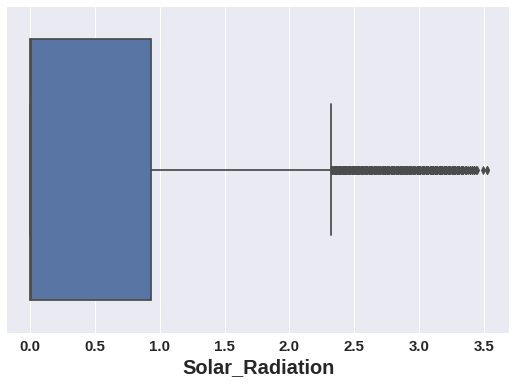

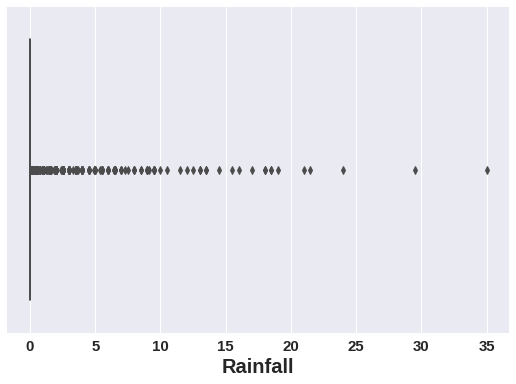

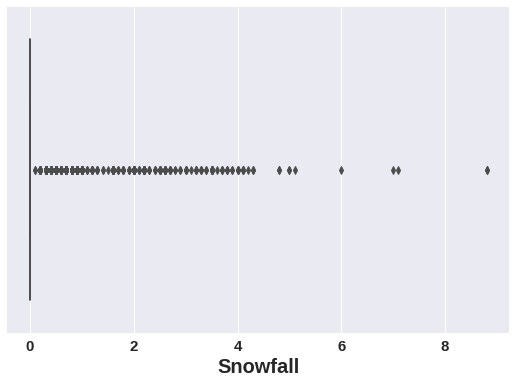

In [ ]:
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=bike_df[col])

In [ ]:
# windspeed,snowfall,solar radiations,rainfall,

In [ ]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
lowerbound,upperbound=outlier_treatment([bike_df['Wind_speed']])
lowerbound1,upperbound1=outlier_treatment([bike_df['Snowfall']])
lowerbound2,upperbound2=outlier_treatment([bike_df['Solar_Radiation']])
lowerbound3,upperbound3=outlier_treatment([bike_df['Rainfall']])

In [ ]:
lowerbound,upperbound


(-1.1999999999999997, 4.3999999999999995)

In [ ]:
lowerbound1,upperbound1


(0.0, 0.0)

In [ ]:
lowerbound2,upperbound2


(-1.35, 2.25)

In [ ]:
lowerbound3,upperbound3

(0.0, 0.0)

In [ ]:
bike_df.drop(bike_df[(bike_df.Wind_speed < lowerbound) | (bike_df.Wind_speed > upperbound)].index,inplace=True)
bike_df.drop(bike_df[(bike_df.Snowfall < lowerbound1) | (bike_df.Snowfall > upperbound1)].index,inplace=True)
bike_df.drop(bike_df[(bike_df.Solar_Radiation < lowerbound2) | (bike_df.Solar_Radiation > upperbound2)].index,inplace=True)
bike_df.drop(bike_df[(bike_df.Rainfall < lowerbound3) | (bike_df.Rainfall > upperbound3)].index,inplace=True)

In [ ]:
bike_df.shape

(7006, 14)

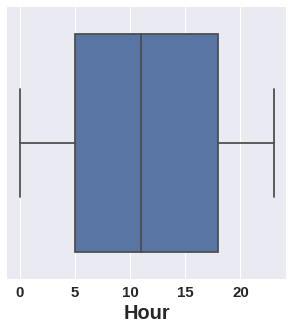

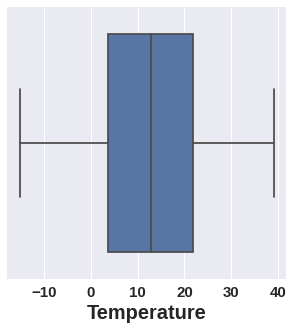

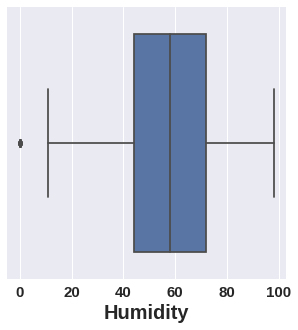

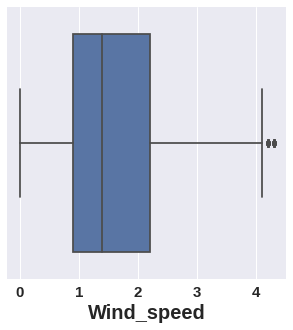

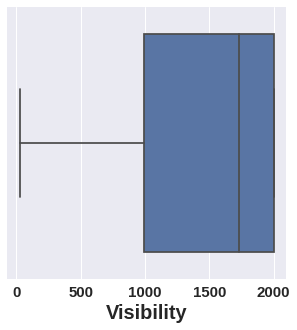

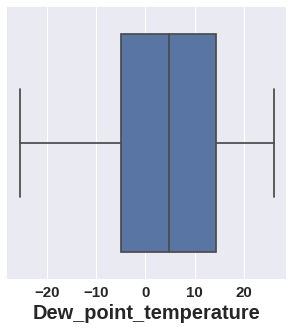

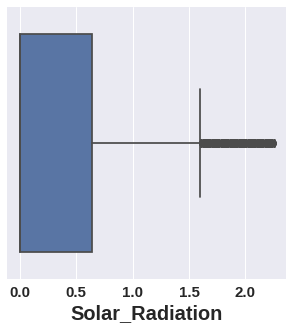

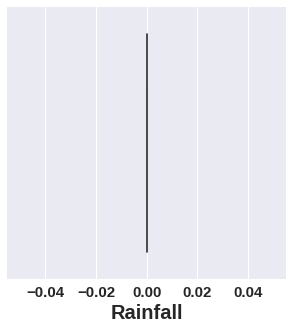

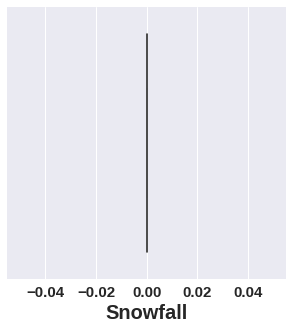

In [ ]:
for col in numeric_col:
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca()
    sns.boxplot(x=bike_df[col])